# Star Data Analysis
 
Anthony Dawson 2021.ipynb

10/02/21

---

This programme reads, analyses and plots star data from a text file.

The absolute magnitude is calculated from the formula $$ m - M = 5{log} (\frac{d}{10}) $$

Given the parallax angle $p$ and ${d} = \frac{1}{p}$

After this the programme then plots Absolute Magnitude versus B-V Colour and the number and proportion of red giants, white dwarfs, and main sequence stars are estimated. 

The final plot also displays the luminositys of the data, resembling the Hertzsprung Russell diagram

---
1. Load in star data
2. Create and name arrays to store columns of data from file
3. Populate arrays with data from StarData.txt
4. Check with first value from each column 
5. Plot and add a title and label the axes
6. Perform integer operations to lists
7. Create new absolute magnitude column
8. Plot absolute magnitude versus B-V Colour
9. Use paths to segment data into BV Colour and Absolute Magnitude sets to differentiate between types
10. Plot the paths for each type and highlight each segment
11. Calculate the counts of each type of star from the paths
12. Calculate the approximate percentage of each star type in the data set
13. Calculate Luminosity limits from absolute magnitude limits
14. Create a secondary axis using the luminosity limits

1 : Load and display data from text file 

In [1]:
#Load in some data
FileData = open('StarFile.txt', 'r')
print(FileData.readline())


    2.00   4.61  +1.04  +0.0135   149   



In [2]:
Data = FileData.readlines()

for line in Data:
    Columns = line.split()

In [3]:
with open('StarFile.txt') as Data:
    lines = Data.read().splitlines()

In [4]:
#Create and name arrays to store columns of data from file
IDNumber = []
VMagnitude = []
BVColour = []
ObservedParallax = []
UncertaintyParallax = []

#populate arrays with data from StarData.txt
for line in lines:
    Columns = line.split()
    IDNumber.append(float(Columns[0]))
    VMagnitude.append(float(Columns[1]))
    BVColour.append(float(Columns[2]))
    ObservedParallax.append(float(Columns[3]))
    UncertaintyParallax.append(float(Columns[4]))
    

#Check with first value from each column    
print(IDNumber[0])
print(VMagnitude[0])
print(BVColour[0])
print(ObservedParallax[0])
print(UncertaintyParallax[0])

2.0
4.61
1.04
0.0135
149.0


2 : Code will make a scatter plot of the star apparent magnitude versus colour i.e. mV on the
y-axis and mB − mV on the x-axis. This is called a colour-magnitude diagram.
You can experiment with different marker symbols and sizes for the scatter plot.
Each point should be visible, but not so big that they overlap a lot.


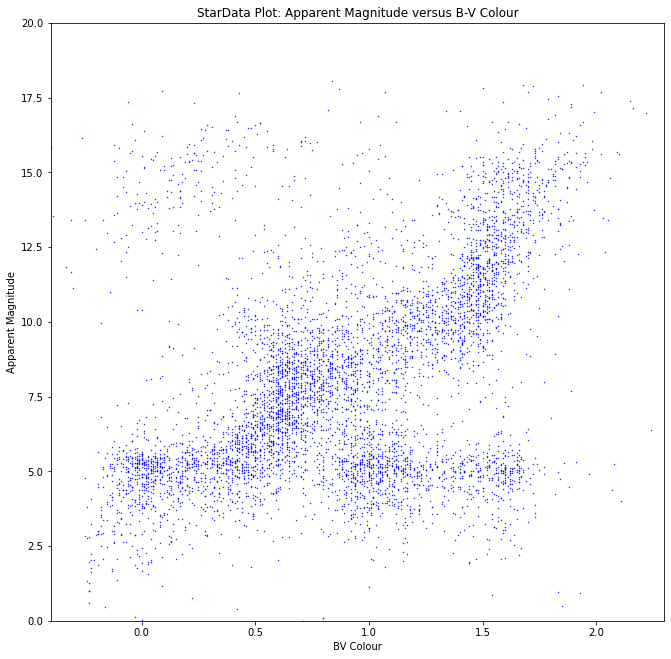

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = BVColour    #column 3
y = VMagnitude  #column 2


#Plot and add a title and label the axes
plt.scatter(x, y, c ="blue", s = 0.2)
plt.axis([-0.4, 2.3, 0, 20])
plt.title("StarData Plot: Apparent Magnitude versus B-V Colour")
plt.xlabel("BV Colour")
plt.ylabel("Apparent Magnitude")
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.show()

3 : The code creates a new dataset for absolute magnitude and creates a new plot using this data versus B-V colour. Following this the plot is then analysed and the number and proportion of red giants, white dwarfs, and main sequence stars are estimated. 

In [6]:
## Perform integer operations to lists

VMagnitudeWithInt = [num + 5 for num in VMagnitude]
Parallax = [1 / num for num in ObservedParallax]
Distance = [num / 10 for num in Parallax]

# Add a new column with the absolute magnitude
M_V = []

M_V = VMagnitudeWithInt - 5*(np.log(Distance))

# Test output before proceeding 
print(M_V)

[-0.4024025  11.78660281 13.40480836 ...  5.63692857 13.10602601
  2.34523322]


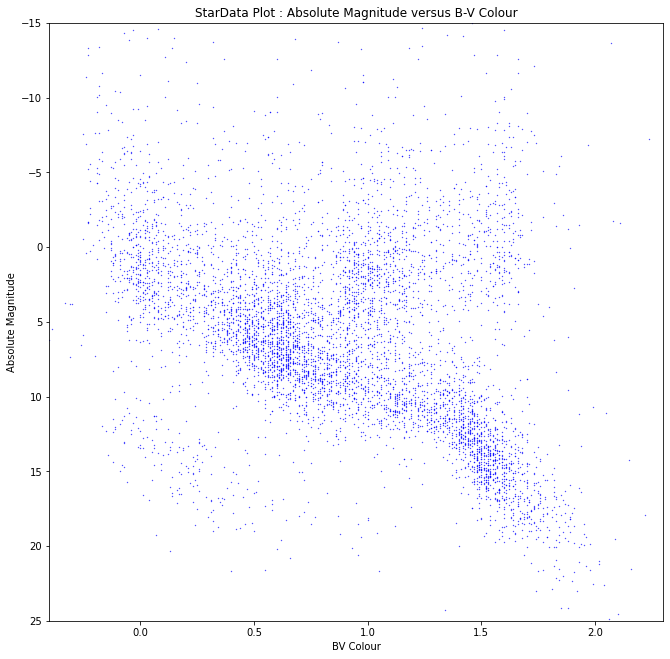

In [21]:
x = BVColour    #column 3
y = M_V         #column 2


#Plot and add a title and label the axes
scatter = plt.scatter(x, y, c ="blue", s = 0.1)
plt.axis([-0.4, 2.3, -15, 25])
plt.title("StarData Plot : Absolute Magnitude versus B-V Colour")
plt.xlabel("BV Colour")
plt.ylabel("Absolute Magnitude")
ax = scatter.axes
ax.invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.show()

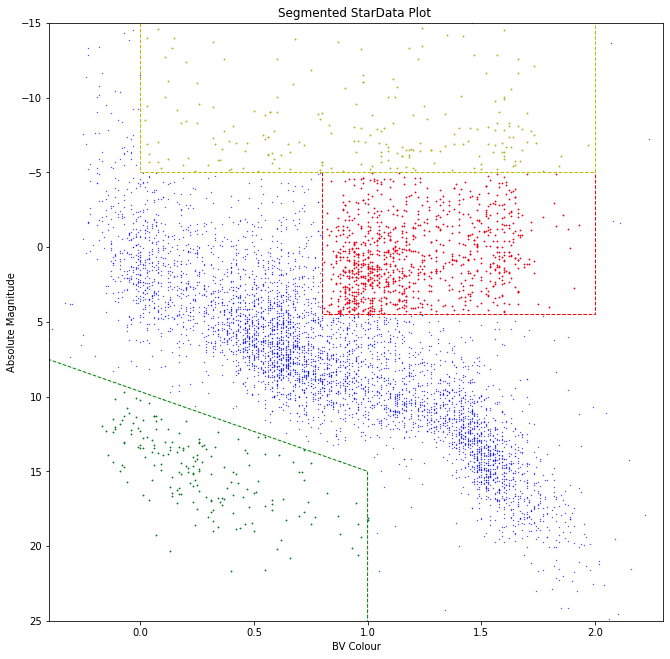

In [20]:
# Use paths to segment data into BV Colour and Absolute Magnitude sets to differentiate between types

import matplotlib.path as mpath
points = np.column_stack([x, y])

verts = np.array([[-0.5, -0.5, 1, 1], [25, 7, 15, 25]]).T            #Specify path vertices
path = mpath.Path(verts)                                             #Follow vertices creating 4 sided shape
whitedwarfs = points[path.contains_points(points)]                   #Count all points inside the shape

# Follow same steps for each star type
verts_1 = np.array([[0.8, 0.8, 2, 2], [-5, 4.5, 4.5, -5]]).T  
path_1 = mpath.Path(verts_1)                                             
giants = points[path_1.contains_points(points)]

# Include super giants to allow for main sequence calculation
verts_2 = np.array([[0, 0, 2, 2], [-15, -5, -5, -15]]).T
path_2 = mpath.Path(verts_2)                                              
supergiants = points[path_2.contains_points(points)]

scatter = plt.scatter(x, y, c ="blue", s = 0.1)
plt.axis([-0.4, 2.3, -15, 25])
plt.title("Segmented StarData Plot ")
plt.xlabel("BV Colour")
plt.ylabel("Absolute Magnitude")

# Plot the paths for each type and highlight each segment
plt.plot([-0.5, -0.5, 1, 1], [25, 7, 15, 25], color='g', linewidth=1, linestyle='--')
plt.scatter(whitedwarfs[:,0], whitedwarfs[:,1], c='g', s=0.5)

plt.plot([0.8, 0.8, 2, 2], [-5, 4.5, 4.5, -5], color='r', linewidth=1, linestyle='--')
plt.scatter(giants[:,0], giants[:,1], c='r', s=0.5)

plt.plot([0, 0, 2, 2], [-15, -5, -5, -15], color='y', linewidth=1, linestyle='--')
plt.scatter(supergiants[:,0], supergiants[:,1], c='y', s=0.5)

#Format the plot
ax = scatter.axes
ax.invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.show()

In [18]:
# Output the counts of each type of star from the paths
print("Number of white dwarfs in green: " + str(len(whitedwarfs)))
print("Number of red giants in red: " + str(len(giants)))
print("Number of supergiants in yellow: " + str(len(supergiants)))

# Total number minus the three prior counts will give the number of main sequence stars
print("total stars: " + str(len(points)))
print("Number of main sequence stars in blue: 4788")      

Number of white dwarfs in green: 187
Number of red giants in red: 1035
Number of supergiants in yellow: 210
total stars: 6220
Number of main sequence stars in blue: 4788


In [10]:
# Calculate the approximate percentage of each star type in the data set
percent_dwarfs = (187 / 6220)*100
print("Approx percentage white dwarfs is{0:10.3} %".format(percent_dwarfs))

percent_red_giants = (1035 / 6220) *100
print("Approx percentage red giants is{0:10.3} %".format(percent_red_giants))

percent_main_sequence = (4788 / 6220) * 100
print("Approx percentage main sequence is{0:10.3} %".format(percent_main_sequence))

Approx percentage white dwarfs is      3.01 %
Approx percentage red giants is      16.6 %
Approx percentage main sequence is      77.0 %


4: The absolute magnitude of the sun is 4.83. Using this
information, on the right hand vertical axis the luminosity scale for the stars in the colour magnitude diagram is also displayed,
in units of solar luminosities.


8.550667128846805e-09
85506671.28846823


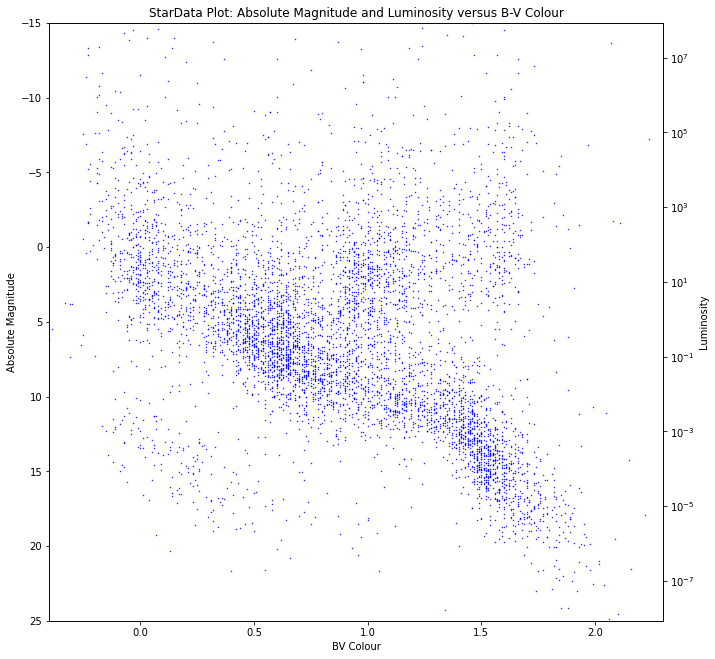

In [23]:
#Calculate Luminosity limits from absolute magnitude limits
Upper = 10**((4.83-25)/2.5)

Lower = 10**((4.83+15)/2.5)

# Creating scatter plot
scatter = plt.scatter(x, y, c ="blue", s = 0.2)
plt.axis([-0.4, 2.3, -15, 25])
plt.title("StarData Plot: Absolute Magnitude and Luminosity versus B-V Colour")
plt.xlabel("BV Colour")
plt.ylabel("Absolute Magnitude")
ax = scatter.axes
ax.invert_yaxis()
fig = plt.gcf()

# Create a secondary axis using the luminosity limits
Rax = plt.twinx()
Rax.set_ylabel("Luminosity") 
Rax.set_ylim(Upper, Lower)
Rax.set_yscale("log")
fig.set_size_inches(11, 11)
plt.show()